# Visualizing Subspots

## Imports

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

## Read sunspot data

The data for this notebook comes from the "Yearly mean total sunspot number [1700 - now]" from the [SILSO](http://www.sidc.be/silso/datafiles) website. 

Use Pandas `read_csv` function to read the file `data/SN_y_tot_V2.0.csv` as a `DataFrame`:

* Look at the tests below for information on how to parse the CSV file.
* You will likely need to set the `sep`, `header`, `usecols` and `names` keyword arguments to `read_csv`.
* In the `SunspotsError` column, replace the missing value `-1` by `0`.
* Save your `DataFrame` in a variable `data`.

In [2]:
!head data/SN_y_tot_V2.0.csv

1700.5;   8.3; -1.0;    -1;1
1701.5;  18.3; -1.0;    -1;1
1702.5;  26.7; -1.0;    -1;1
1703.5;  38.3; -1.0;    -1;1
1704.5;  60.0; -1.0;    -1;1
1705.5;  96.7; -1.0;    -1;1
1706.5;  48.3; -1.0;    -1;1
1707.5;  33.3; -1.0;    -1;1
1708.5;  16.7; -1.0;    -1;1
1709.5;  13.3; -1.0;    -1;1


In [3]:
data = pd.read_csv('data/SN_y_tot_V2.0.csv', sep=';', names=['Year', 'Sunspots' , 'SunspotsError'], usecols=[0,1,2])
data.SunspotsError = data.SunspotsError.replace(-1, 0)

In [4]:
data.head()

,Year,Sunspots,SunspotsError
0,1700.5,8.3,0.0
1,1701.5,18.3,0.0
2,1702.5,26.7,0.0
3,1703.5,38.3,0.0
4,1704.5,60.0,0.0


In [5]:
assert list(data.columns)==['Year', 'Sunspots', 'SunspotsError']
assert len(data)==317
assert data.Year.dtype==np.dtype(float)
assert data.Sunspots.dtype==np.dtype(float)
assert data.SunspotsError.dtype==np.dtype(float)

## Line chart

Make a line plot showing the sunspot count (y) as a function of year (x).

* Use the default Matplotlib 2.0 style as your starting point.
* Adjust the aspect ratio/size so that the steepest slope in your plot is *approximately* 1.
* Label the x- and y- axes and plot title.
* Use y axis gridlines.
* Pass data to `plt.plot` using the `data` keyword argument for Matpotlib.

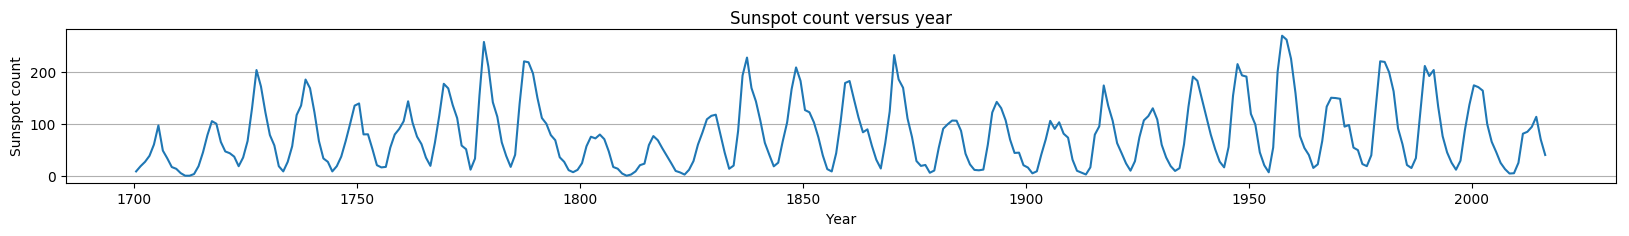

In [6]:
plt.style.use('default')

fig1= plt.figure(figsize=(20,2))
axes1 = plt.axes()

axes1.plot('Year', 'Sunspots', data=data)
axes1.yaxis.grid(True)
axes1.set_ylabel('Sunspot count')
axes1.set_xlabel('Year')
axes1.set_title('Sunspot count versus year');

## Measurements with error bars

Make a scatter plot with error bars showing the sunspot count (y) and its error (yerr) over time (x).

* Use the default Matplotlib 2.0 style as your starting point.
* Adjust the aspect ratio/size so that the steepest slope in your plot is *approximately* 1.
* Label the x- and y- axes and plot title.
* Use y axis gridlines.
* Pass data to `plt.errorbar` using the `data` keyword argument for Matpotlib.
* Filter the `DataFrame` to only include years after 1985.
* Use a format of `fmt='.k'`.

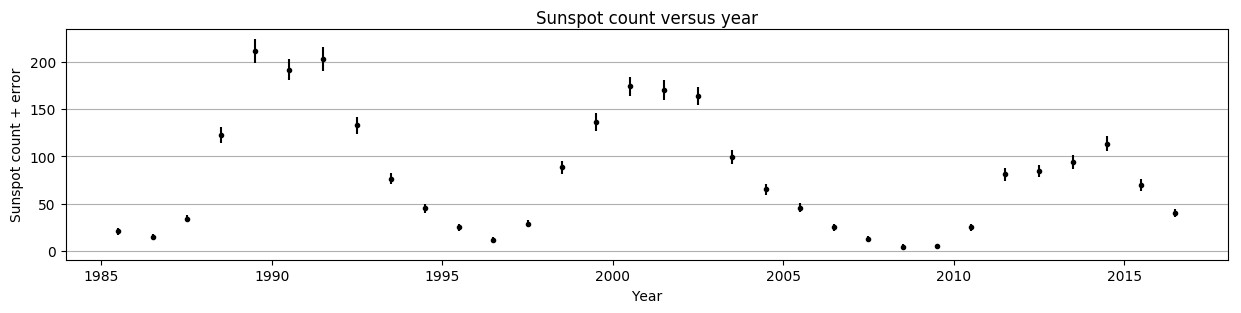

In [7]:
plt.style.use('default')

fig2 = plt.figure(figsize=(15, 3))
axs2 = plt.axes()

data_recent = data[data.Year > 1985]

axs2.errorbar('Year', 'Sunspots', 'SunspotsError', fmt='.k', data=data_recent);
axs2.yaxis.grid(True)
axs2.set_ylabel('Sunspot count + error')
axs2.set_xlabel('Year')
axs2.set_title('Sunspot count versus year');

## Subplots by century

Now make 4 subplots, one for each century in the data set, with the x axis for time and the y axis for count. This approach works well for this dataset as it allows you to maintain mild slopes while limiting the overall width of the visualization. Perform similar customizations as above:

* Use the default Matplotlib 2.0 style as your starting point.
* Label the x- and y- axes and plot title.
* Use y axis gridlines.
* Pass data to `plt.plot` using the `data` keyword argument for Matpotlib.
* Set appropriate plot limits for each century.

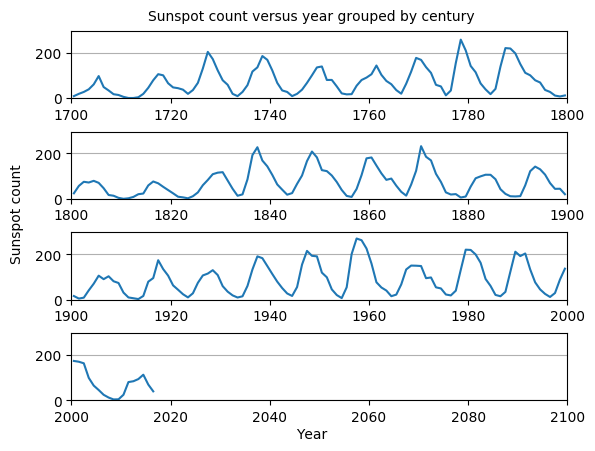

In [8]:
bins = [1700, 1800, 1900, 2000, 2100]
binned_years = pd.cut(data.Year, bins, right=False)

ymax = data.Sunspots.max() * 1.10
ymin = 0

plt.style.use('default')

fig3, ax3 = plt.subplots(len(binned_years.cat.categories), 1, sharey='row')
fig3.subplots_adjust(hspace=0.5)

for century_index, century in enumerate(binned_years.cat.categories):
    century_subset = data[binned_years == century]
    ax3[century_index].plot(century_subset.Year, century_subset.Sunspots)
    ax3[century_index].set_xlim([bins[century_index], bins[century_index + 1]])
    ax3[century_index].set_ylim([ymin, ymax])
    ax3[century_index].yaxis.grid(True)
    
fig3.text(0.5, 0.04, 'Year', ha='center', va='center')
fig3.text(0.04, 0.5, 'Sunspot count', ha='center', va='center', rotation='vertical');
fig3.text(0.5, 0.925, 'Sunspot count versus year grouped by century', ha='center', va='top');